# US Market Data

## Intro

#### Data Source:

This data is from kaggle, uploaded by Muhammad Ehsan. Each row of the csv is stock, commodity, and cryptocurrency volume and price data from single day, with no days repeating. The temporal data runs from January 1, 2020 to February 2, 2024.

In [1430]:
import pandas as pd
import numpy as np
df = pd.read_csv("US_Stock_Data_Fixed.csv")
pd.set_option('display.max_columns', None) 

## Data Cleaning

In [1431]:
# Convert 'Day', 'Month', 'Year' to a single 'Date' column, then drop the former three
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.drop(['Day', 'Month', 'Year'], axis=1, inplace=True)

# Convert the concatenated Date column to datetime format, but keep only date
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date

df

,Unnamed: 0,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,Ethereum_Price,Ethereum_Vol.,S&P_500_Price,Nasdaq_100_Price,Nasdaq_100_Vol.,Apple_Price,Apple_Vol.,Tesla_Price,Tesla_Vol.,Microsoft_Price,Microsoft_Vol.,Silver_Price,Silver_Vol.,Google_Price,Google_Vol.,Nvidia_Price,Nvidia_Vol.,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.,Date
0,0,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650,901.6,NaN,"2,309.28",246890,"4,958.61","17,642.73",315620000.0,185.85,102550000,187.91,110610000,411.22,28260000,22.796,NaN,142.38,62500000,661.60,47660000,"5,89,498",10580,564.64,4030000,171.81,117220000,474.99,84710000,"2,053.70",NaN,2024-02-01
1,1,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690,922.3,NaN,"2,304.28",323610,"4,906.19","17,344.71",240640000.0,186.86,53490000,188.86,90680000,403.78,29230000,23.236,85160.0,141.16,37120000,630.27,36020000,"5,81,600",9780,567.51,3150000,159.28,66360000,394.78,25140000,"2,071.10",260920.0,2024-01-01
2,2,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480,932.6,NaN,"2,283.14",408790,"4,848.87","17,137.24",366450000.0,184.40,54830000,187.29,102270000,397.58,46780000,23.169,66910.0,140.10,71370000,615.27,45070000,"5,78,020",9720,564.11,4830000,155.20,49690000,390.14,20010000,"2,067.40",238370.0,2024-01-31
3,3,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130,931.7,NaN,"2,343.11",387120,"4,924.97","17,476.71",236210000.0,188.04,55270000,191.59,105540000,408.59,29340000,23.225,53370.0,151.46,33060000,627.74,39600000,"5,84,680",9750,562.85,6120000,159.00,42290000,400.06,18610000,"2,050.90",214590.0,2024-01-30
4,4,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230,938.3,NaN,"2,317.79",318840,"4,927.93","17,596.27",238750000.0,191.73,46890000,190.93,123600000,409.72,23290000,23.134,330.0,153.51,27590000,624.65,33900000,"5,78,800",13850,575.79,6880000,161.26,42840000,401.02,17790000,"2,034.90",1780.0,2024-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1008,2.141,242560.0,59.61,1210000.0,2.8120,77700.0,"8,059.60",1190000,961,NaN,140.81,13710000,"3,253.05","8,912.37",164570000.0,75.80,132360000,32.81,467990000,160.09,27760000,18.167,180480.0,70.25,35330000,60.09,27720000,"3,39,188",190,339.26,7110000,94.60,70240000,215.22,13490000,"1,560.20",813410.0,2020-01-08
1009,1009,2.162,163010.0,62.70,582650.0,2.7935,59470.0,"8,155.70",1010000,977.75,NaN,143.04,13580000,"3,237.18","8,846.45",151390000.0,74.60,111510000,31.27,273140000,157.58,21880000,18.393,111960.0,69.76,34530000,59.98,31920000,"3,38,901",280,330.75,4740000,95.34,82680000,213.06,15110000,"1,574.30",435870.0,2020-01-07
1010,1010,2.135,154680.0,63.27,724240.0,2.7900,59570.0,"7,759.10",786750,969.35,NaN,144.08,14360000,"3,246.28","8,848.51",142380000.0,74.95,118580000,30.10,152360000,159.03,20830000,18.179,136410.0,69.89,46790000,59.27,26290000,"3,40,210",280,335.83,5670000,95.14,81310000,212.60,17070000,"1,568.80",558970.0,2020-01-06
1011,1011,2.130,144670.0,63.05,885860.0,2.7870,74750.0,"7,343.10",936290,988.55,NaN,134.27,15670000,"3,234.85","8,793.90",144750000.0,74.36,146540000,29.53,266920000,158.62,21120000,18.151,110020.0,68.08,23410000,59.02,20580000,"3,39,155",220,325.90,3800000,93.75,75330000,208.67,11200000,"1,552.40",436740.0,2020-01-03


In [1432]:
# Drop empty column
df = df.drop(['Unnamed: 0'], axis = 1)

# Set the 'Date' as the index
df.set_index('Date', inplace=True)

# Remove commas from numbers and convert all columns to numeric
df = df.replace({',': ''}, regex=True).apply(pd.to_numeric, errors='coerce')

In [1433]:
df[df.index.isna()]

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,Ethereum_Price,Ethereum_Vol.,S&P_500_Price,Nasdaq_100_Price,Nasdaq_100_Vol.,Apple_Price,Apple_Vol.,Tesla_Price,Tesla_Vol.,Microsoft_Price,Microsoft_Vol.,Silver_Price,Silver_Vol.,Google_Price,Google_Vol.,Nvidia_Price,Nvidia_Vol.,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [1434]:
df.describe()

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,Ethereum_Price,Ethereum_Vol.,S&P_500_Price,Nasdaq_100_Price,Nasdaq_100_Vol.,Apple_Price,Apple_Vol.,Tesla_Price,Tesla_Vol.,Microsoft_Price,Microsoft_Vol.,Silver_Price,Silver_Vol.,Google_Price,Google_Vol.,Nvidia_Price,Nvidia_Vol.,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
count,1013.000000,1009.000000,1013.000000,9.900000e+02,1013.000000,976.000000,1013.000000,1.013000e+03,1013.000000,636.000000,1013.000000,1.013000e+03,1013.000000,1013.000000,1.012000e+03,1013.000000,1.013000e+03,1013.000000,1.013000e+03,1013.000000,1.013000e+03,1013.000000,967.000000,1013.000000,1.013000e+03,1013.000000,1.013000e+03,1013.000000,1013.000000,1013.000000,1.013000e+03,1013.000000,1.013000e+03,1013.000000,1.013000e+03,1013.000000,1011.000000
mean,3.726667,129091.932607,69.853475,3.571739e+05,3.726843,37606.752049,29215.594965,4.924137e+07,978.398371,9082.515723,1731.787502,1.958002e+07,3986.569378,13015.564245,2.359978e+08,141.964462,9.789383e+07,208.928263,1.330475e+08,265.838855,3.044173e+07,22.795356,64216.804550,108.659882,3.428595e+07,219.738065,4.629821e+07,424871.307009,2918.400790,422.035479,7.012043e+06,137.426209,7.452566e+07,252.151046,2.504895e+07,1839.171668,189442.393670
std,1.943030,64035.426727,21.986697,1.864309e+05,0.646524,39192.315092,15115.630151,3.251389e+08,108.577041,8876.538587,1100.176730,1.469409e+08,534.132257,2238.770122,8.363617e+07,33.778785,5.449910e+07,84.917541,8.782393e+07,57.493641,1.296626e+07,3.170649,38330.214569,25.438302,1.502695e+07,128.668703,1.878815e+07,82654.637405,2715.637488,119.765870,6.788094e+06,27.321896,3.376809e+07,72.949246,1.635122e+07,119.066900,104007.872337
min,1.482000,1200.000000,-37.630000,1.702000e+04,2.100500,10.000000,4826.000000,2.600000e+02,595.200000,0.000000,107.900000,7.518000e+04,2237.400000,6994.290000,6.857000e+07,56.090000,2.404000e+07,24.080000,2.940000e+07,135.420000,9.200000e+06,11.772000,0.000000,52.710000,9.310000e+06,49.100000,9.790000e+06,240000.000000,120.000000,166.370000,1.140000e+06,81.820000,2.162000e+07,88.910000,5.470000e+06,1477.900000,0.000000
25%,2.447000,88680.000000,54.760000,2.751800e+05,3.408000,380.000000,17180.100000,7.142000e+04,909.600000,1120.000000,1058.940000,5.272300e+05,3694.620000,11573.180000,1.845550e+08,124.610000,6.235000e+07,160.950000,7.886000e+07,223.290000,2.230000e+07,21.327000,46275.000000,88.130000,2.471000e+07,131.980000,3.348000e+07,349540.000000,760.000000,338.630000,3.780000e+06,114.770000,5.192000e+07,195.210000,1.612000e+07,1763.800000,142985.000000
50%,2.880000,125980.000000,72.910000,3.450350e+05,3.800500,31635.000000,27634.900000,1.288800e+05,969.700000,6070.000000,1702.800000,9.665800e+05,4101.230000,13079.520000,2.239500e+08,146.500000,8.347000e+07,222.640000,1.070900e+08,260.790000,2.702000e+07,23.383000,59540.000000,111.450000,3.055000e+07,179.130000,4.368000e+07,432000.000000,2040.000000,431.600000,5.380000e+06,142.300000,6.515000e+07,262.010000,2.107000e+07,1835.800000,181200.000000
75%,4.805000,164810.000000,82.810000,4.269225e+05,4.251500,70982.500000,40914.800000,3.860000e+05,1036.900000,15287.500000,2317.790000,3.670000e+06,4399.760000,14897.130000,2.646375e+08,168.640000,1.150900e+08,261.160000,1.569500e+08,308.650000,3.431000e+07,24.949000,75705.000000,131.910000,3.870000e+07,272.470000,5.640000e+07,481955.000000,4090.000000,509.640000,7.890000e+06,161.060000,8.683000e+07,313.190000,2.903000e+07,1936.600000,231500.000000
max,9.647000,381970.000000,123.700000,1.770000e+06,4.937500,176040.000000,67527.900000,4.470000e+09,1297.100000,42830.000000,4808.380000,1.790000e+09,4958.610000,17642.730000,9.825600e+08,198.110000,4.268800e+08,409.970000,9.140800e+08,411.220000,9.707000e+07,29.418000,355280.000000,153.510000,1.232000e+08,661.600000,1.534600e+08,589498.000000,13850.000000,691.690000,1.33

In [1435]:
print(df.shape)
df.isnull().sum()

(1013, 37)


Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        377
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           46
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64

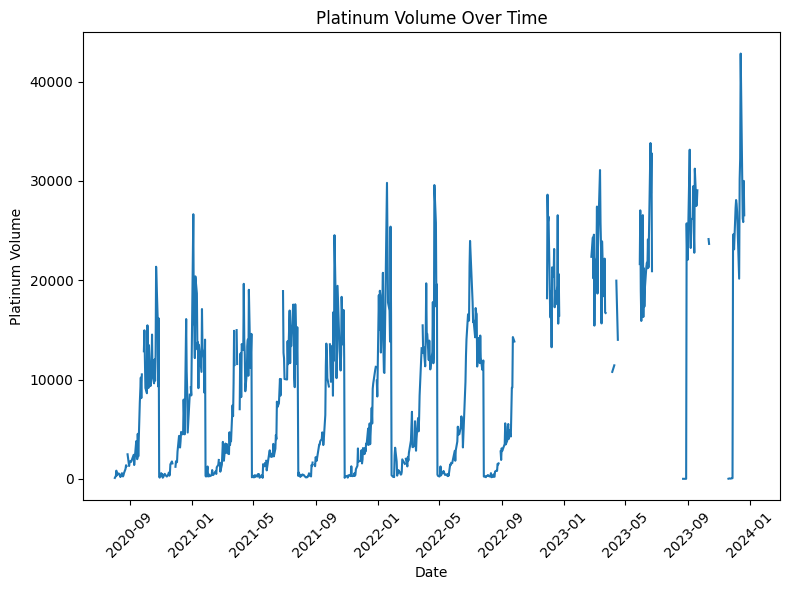

In [1436]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.plot(df.index, df['Platinum_Vol.'])
plt.xlabel('Date')
plt.ylabel('Platinum Volume')
plt.title('Platinum Volume Over Time')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Exploratory Analysis

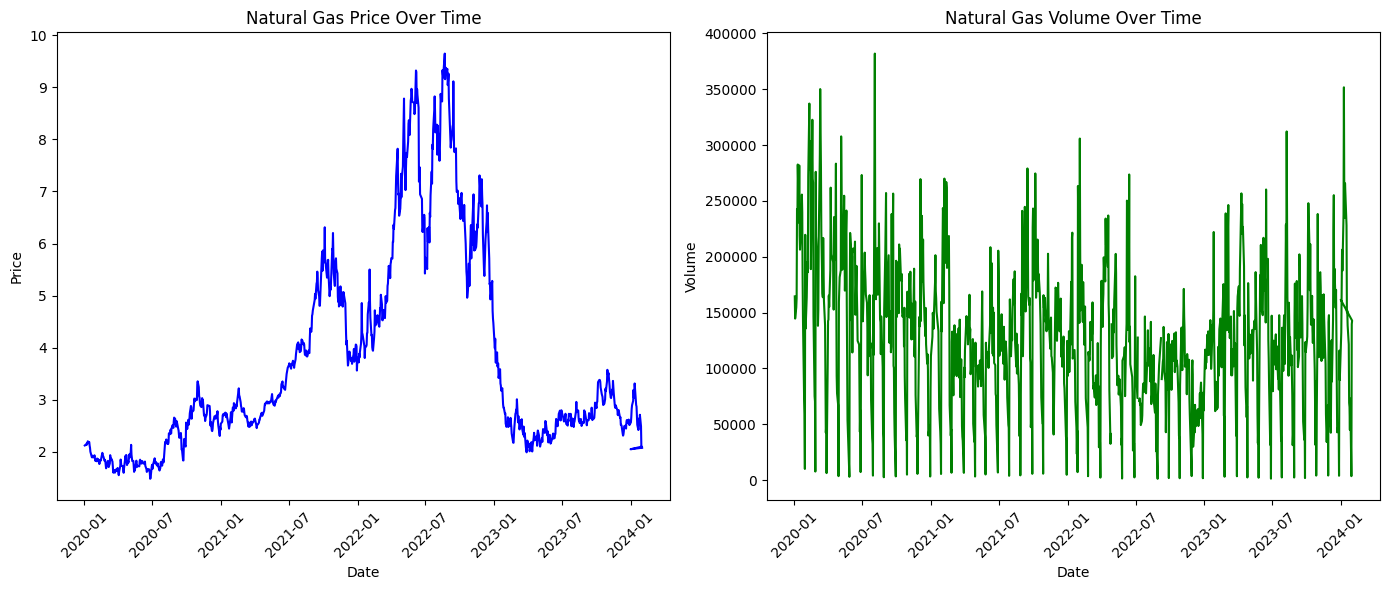

In [1437]:
import matplotlib.pyplot as plt

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot Natural Gas Price on the first subplot
ax[0].plot(df.index, df['Natural_Gas_Price'], label='Natural Gas Price', color='blue')
ax[0].set_title('Natural Gas Price Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].tick_params(axis='x', rotation=45)

# Plot Natural Gas Volume on the second subplot
ax[1].plot(df.index, df['Natural_Gas_Vol.'], label='Natural Gas Volume', color='green')
ax[1].set_title('Natural Gas Volume Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Volume')
ax[1].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()

In [1438]:
df.shape

(1013, 37)

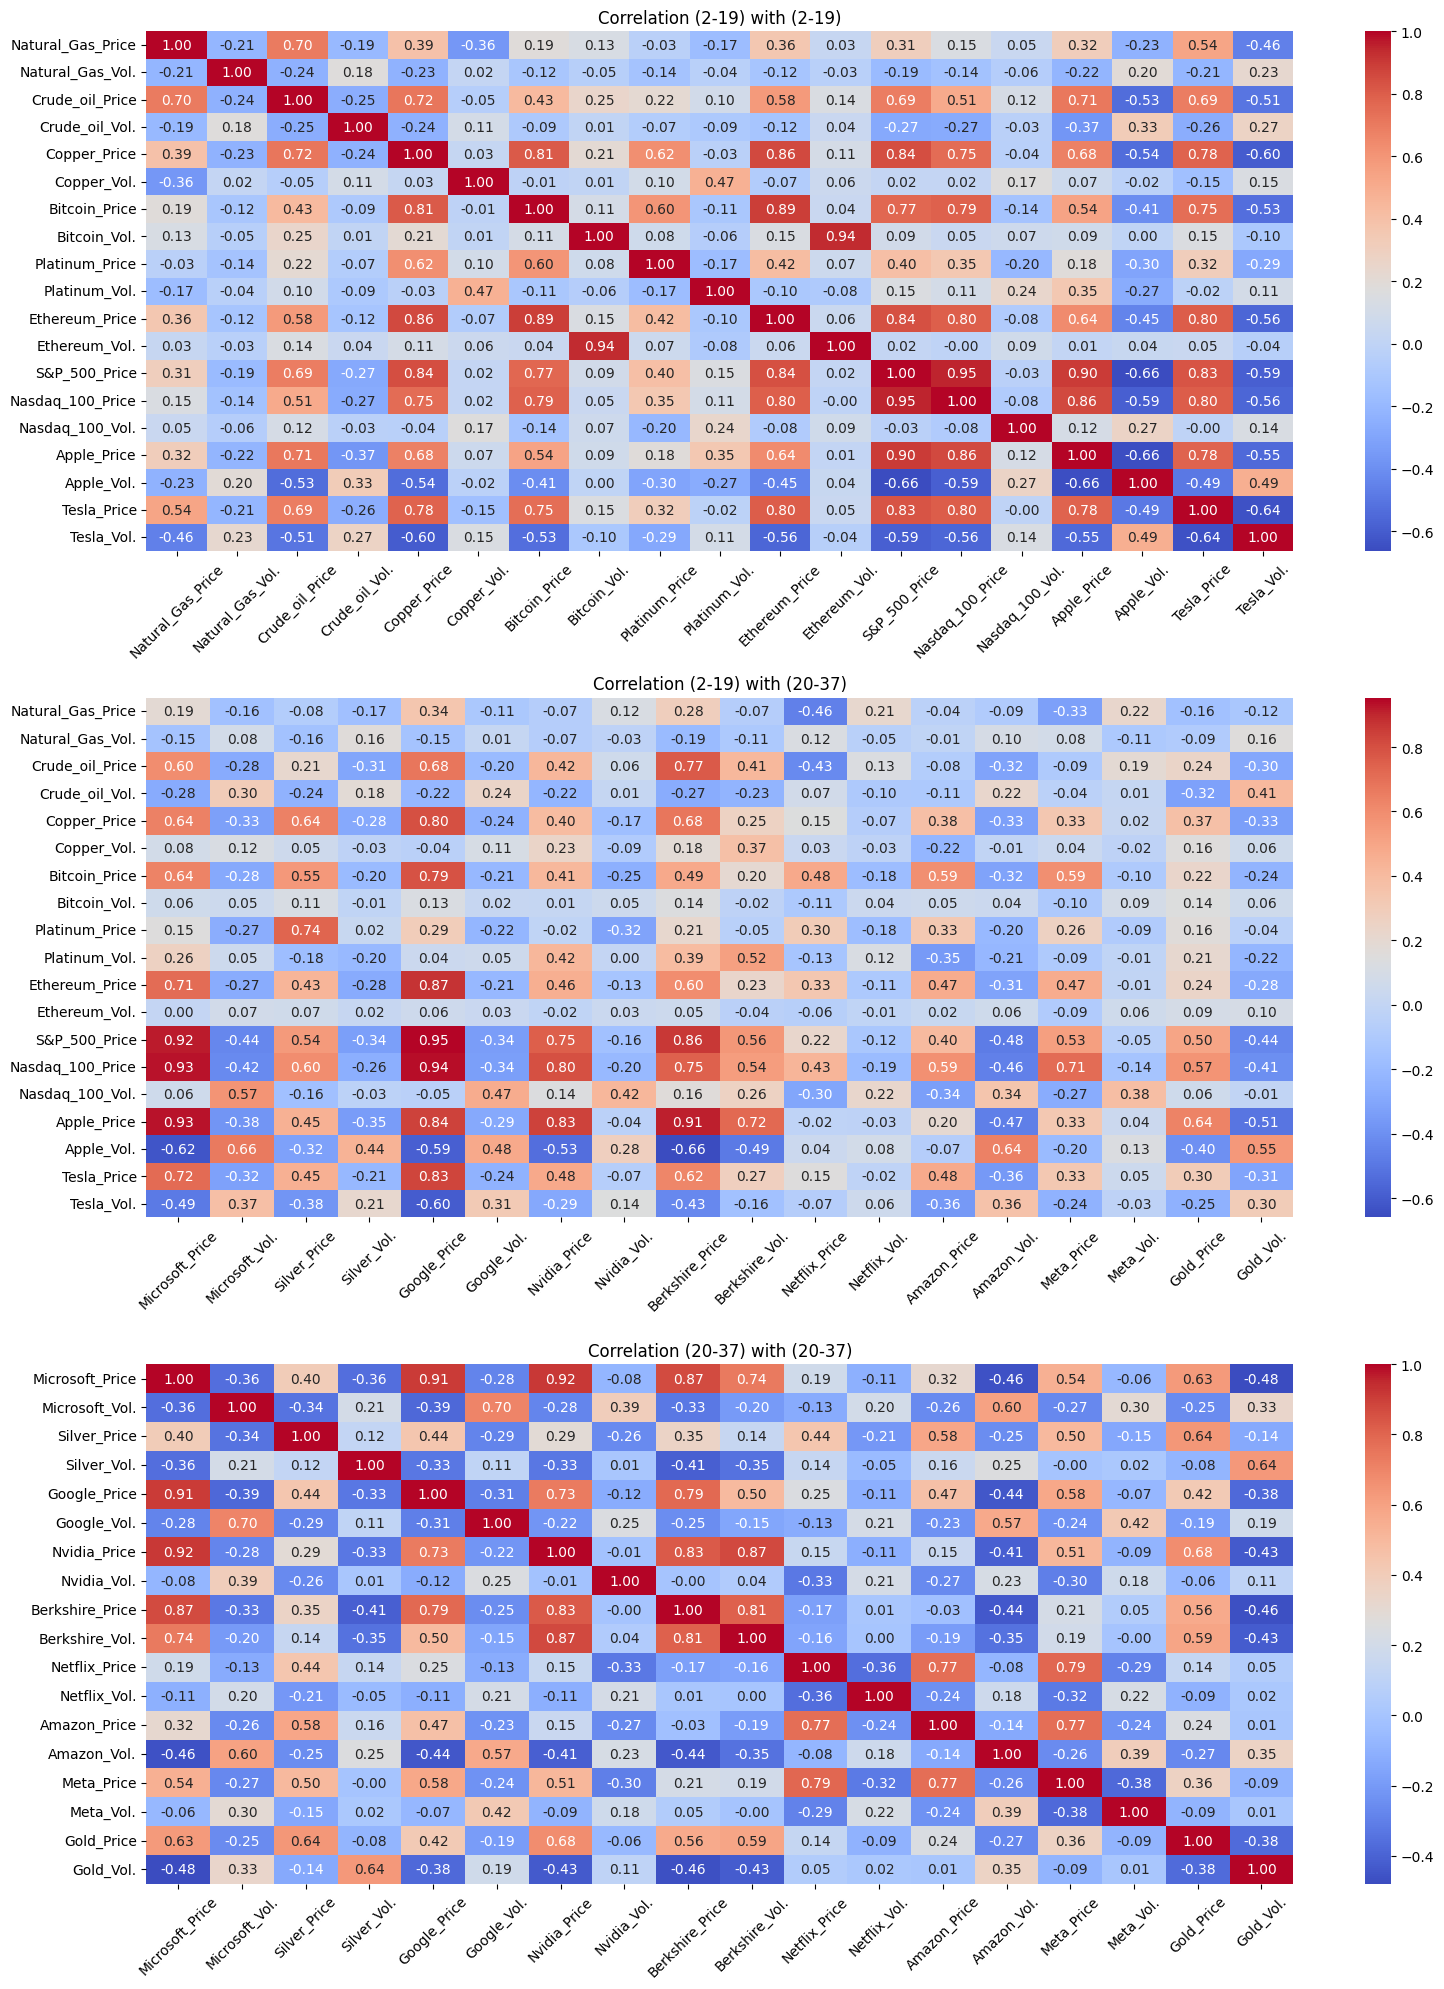

In [1439]:
import seaborn as sns

# Define column indices
cols_2_to_19 = df.columns[0:19]  # Columns 2 to 19 (index 1 to 18)
cols_20_to_37 = df.columns[19:37]  # Columns 20 to 37 (index 19 to 36)

# Compute the correlation matrices
corr_2_19_2_19 = df[cols_2_to_19].corr()
corr_2_19_20_37 = pd.concat([df[cols_2_to_19], df[cols_20_to_37]], axis=1).corr().iloc[:len(cols_2_to_19), len(cols_2_to_19):]
corr_20_37_20_37 = df[cols_20_to_37].corr()

# Create a 3x1 grid of heatmaps
fig, axs = plt.subplots(3, 1, figsize=(16, 20))

# Plot the heatmaps
sns.heatmap(corr_2_19_2_19, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[0])
axs[0].set_title('Correlation (2-19) with (2-19)')
plt.xticks(rotation=45)

sns.heatmap(corr_2_19_20_37, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[1])
axs[1].set_title('Correlation (2-19) with (20-37)')
plt.xticks(rotation=45)

sns.heatmap(corr_20_37_20_37, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[2])
axs[2].set_title('Correlation (20-37) with (20-37)')
plt.xticks(rotation=45)

# Rotate x tick labels
for ax in axs:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

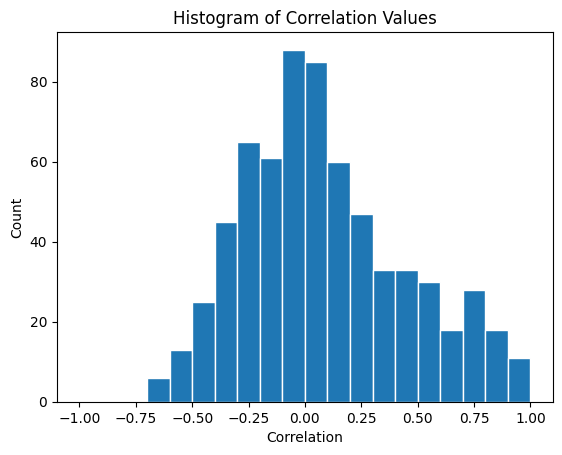

In [1440]:
correlation_matrix = df.corr()

# Flatten the correlation matrix into a 1D array (excluding the diagonal)
corr_values = correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)]

# Create the histogram with bins of size 0.1
plt.hist(corr_values, bins=np.arange(-1, 1.1, 0.1), edgecolor='white')

# Add labels and title
plt.xlabel('Correlation')
plt.ylabel('Count')
plt.title('Histogram of Correlation Values')

# Show the plot
plt.show()

In [1441]:
import math

# Using threshold of > |0.7|
threshold = 0.7
significant_pairs = []
count = 0

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)): # Ensures self-correlatios of 1.0 are filtered out
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            significant_pairs.append((correlation_matrix.columns[i], 
                                      correlation_matrix.columns[j], corr_value))
            count += 1

for pair in significant_pairs:
    print(f'{pair[0]} and {pair[1]}: {pair[2]}')
print(f'There are {count} significantly correlated pairs out of {math.comb(df.shape[1], 2)}.')

Natural_Gas_Price and Crude_oil_Price: 0.7001345176686659
Crude_oil_Price and Copper_Price: 0.7162875454591685
Crude_oil_Price and Apple_Price: 0.7076094079658993
Crude_oil_Price and Berkshire_Price: 0.769627833792967
Copper_Price and Bitcoin_Price: 0.8070434421731539
Copper_Price and Ethereum_Price: 0.8579003766760102
Copper_Price and S&P_500_Price: 0.8446337234341224
Copper_Price and Nasdaq_100_Price: 0.7481067159609547
Copper_Price and Tesla_Price: 0.7830887069878051
Copper_Price and Google_Price: 0.7974483444517032
Bitcoin_Price and Ethereum_Price: 0.8907206996012235
Bitcoin_Price and S&P_500_Price: 0.771438195563302
Bitcoin_Price and Nasdaq_100_Price: 0.7867486740323244
Bitcoin_Price and Tesla_Price: 0.7460796148603389
Bitcoin_Price and Google_Price: 0.7905748736499868
Bitcoin_Vol. and Ethereum_Vol.: 0.940570626280912
Platinum_Price and Silver_Price: 0.737899484537827
Ethereum_Price and S&P_500_Price: 0.8417748033884703
Ethereum_Price and Nasdaq_100_Price: 0.7968009086071829
Ether

In [1442]:
stock_prices = df[['Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Google_Price', 'Nvidia_Price', 
                   'Berkshire_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price']]
commodity_prices = df[['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price', 
                       'Platinum_Price', 'Ethereum_Price', 'Silver_Price', 'Gold_Price']]
stock_volume = df[['Apple_Vol.', 'Tesla_Vol.', 'Microsoft_Vol.', 'Google_Vol.', 'Nvidia_Vol.', 
                   'Berkshire_Vol.', 'Netflix_Vol.', 'Amazon_Vol.', 'Meta_Vol.']]
commodity_volume = df[['Natural_Gas_Vol.', 'Crude_oil_Vol.', 'Copper_Vol.', 'Bitcoin_Vol.', 
                       'Platinum_Vol.', 'Ethereum_Vol.', 'Silver_Vol.', 'Gold_Vol.']]

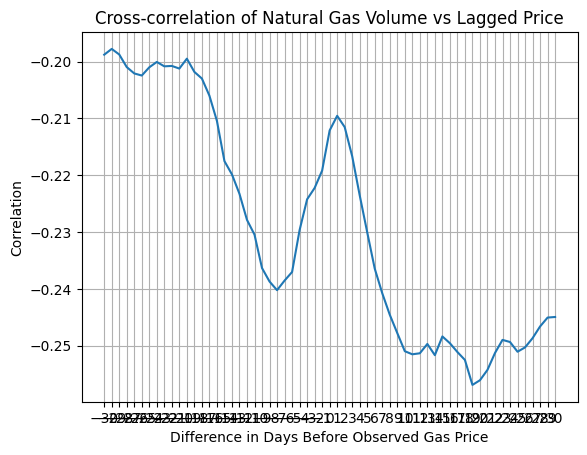

In [1443]:
from statsmodels.tsa.stattools import ccf

lags = range(-30, 31)
cross_corr = [df['Natural_Gas_Vol.'].shift(lag).corr(df['Natural_Gas_Price']) 
              for lag in lags]
plt.plot(lags, cross_corr)
plt.title('Cross-correlation of Natural Gas Volume vs Lagged Price')
plt.xlabel('Difference in Days Before Observed Gas Price')
plt.ylabel('Correlation')
plt.xticks(lags)
plt.grid()
plt.show()

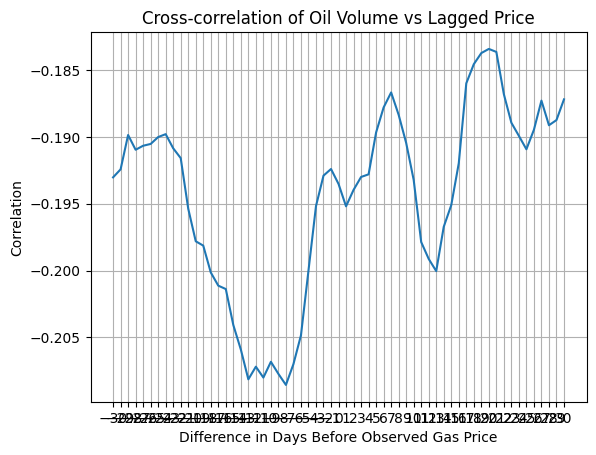

In [1444]:
lags = range(-30, 31)
cross_corr = [df['Crude_oil_Vol.'].shift(lag).corr(df['Natural_Gas_Price']) 
              for lag in lags]
plt.plot(lags, cross_corr)
plt.title('Cross-correlation of Oil Volume vs Lagged Price')
plt.xlabel('Difference in Days Before Observed Gas Price')
plt.ylabel('Correlation')
plt.xticks(lags)
plt.grid()
plt.show()

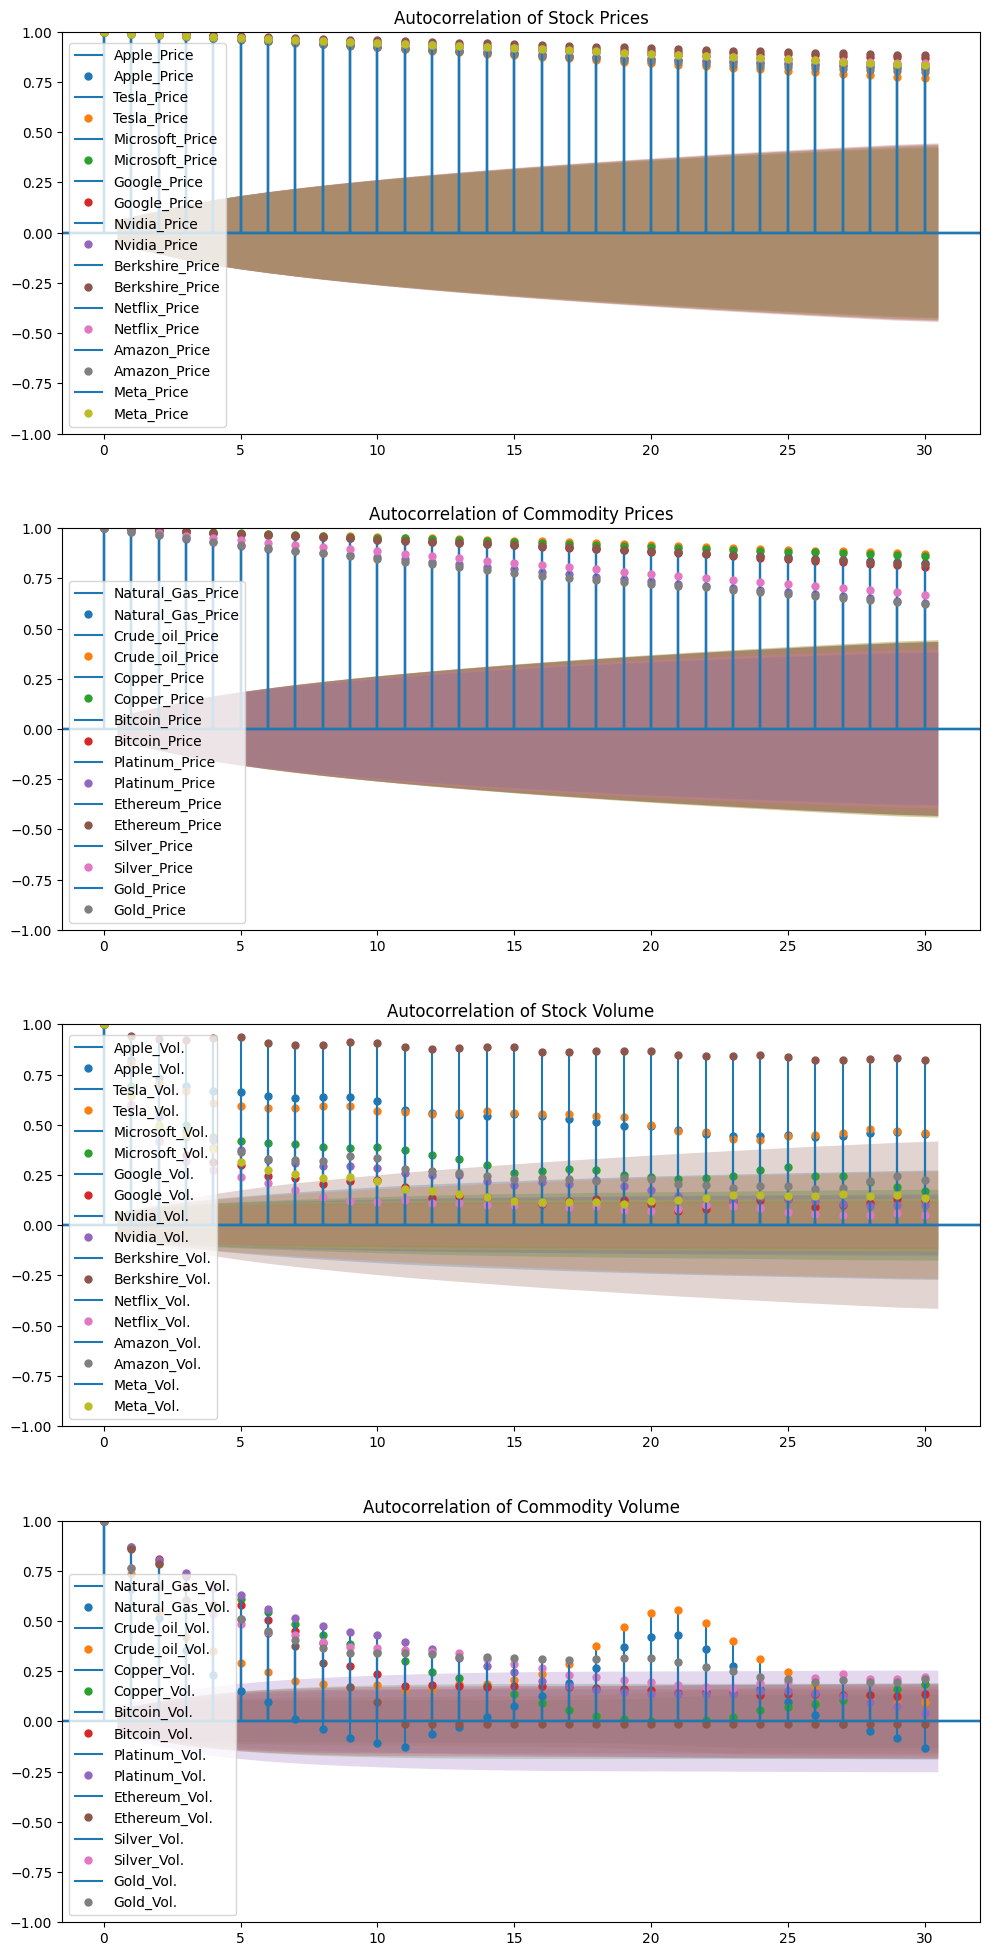

In [1445]:
from statsmodels.graphics.tsaplots import plot_acf

# Create a dictionary to hold the datasets and their labels
datasets = {
    'Stock Prices': stock_prices,
    'Commodity Prices': commodity_prices,
    'Stock Volume': stock_volume,
    'Commodity Volume': commodity_volume
}

# Set up the figure
fig, axes = plt.subplots(len(datasets), 1, figsize=(10, 5 * len(datasets)))

# Iterate through each dataset using 30 lags
for i, (label, data) in enumerate(datasets.items()):
    for column in data.columns:
        plot_acf(data[column].dropna(), lags=30, ax=axes[i], label=column)
        axes[i].set_title(f'Autocorrelation of {label}')
        axes[i].legend(loc='lower left')

plt.tight_layout()
plt.show()

Autocorrelation is high for all prices - both commodity prices and stock prices. Volumes often observe high autocorrelation in the short-term before trending toward zero.
We can conclude that prices today are greatly affected by prices yesterday.

The following commodities or stocks eventually tend toward zero autocorrelation and appear to remain there:

- Bitcoin
- Copper
- Ethereum
- Silver
- Gold (at lag 30)
- Meta
- Netflix
- Google
- Microsoft
- Amazon

Autocorrelation is high for the following volume variables at every lag within one month:

- Berkshire
- Apple
- Tesla

Natural gas and crude oil exhibit a potentialy season patter, dipping into low autocorrelation before rising back out again, only to later trend back toward zero.

Let's widen our scope to look deeper into potential trends.

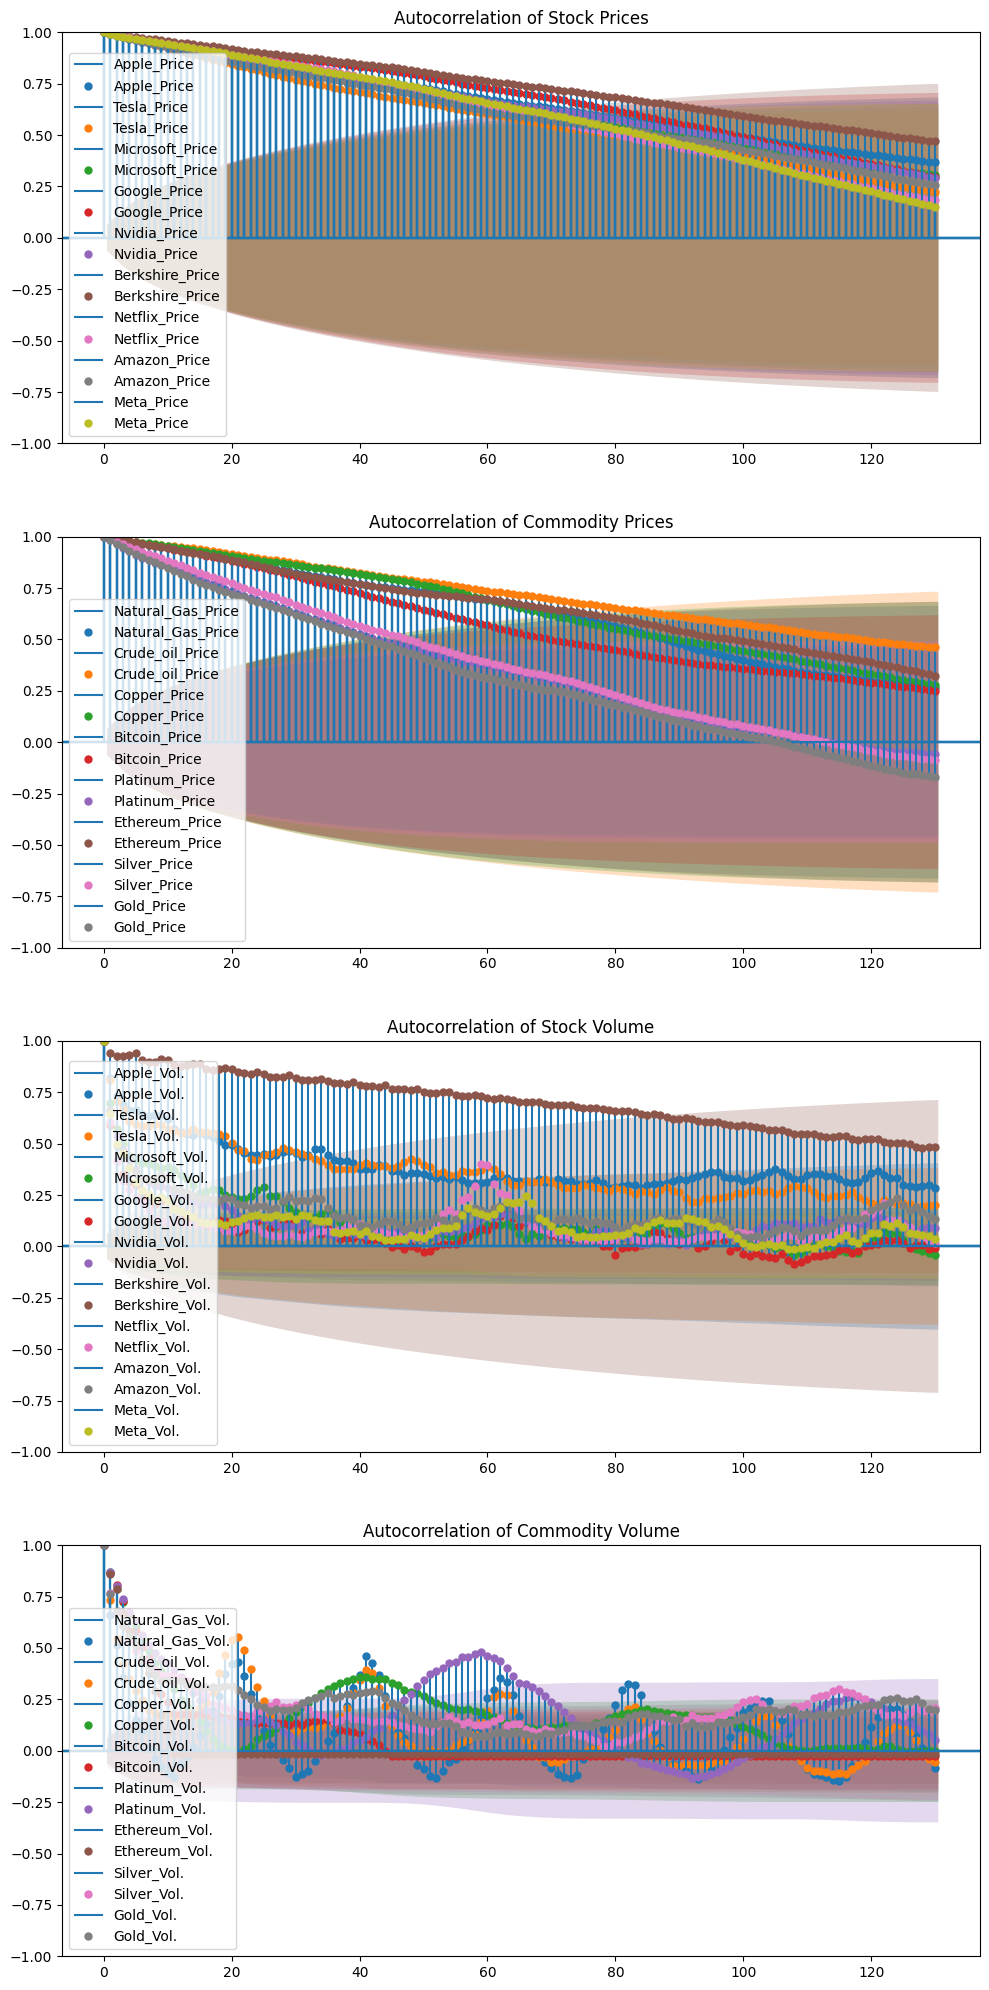

In [1446]:
fig, axes = plt.subplots(len(datasets), 1, figsize=(10, 5 * len(datasets)))

# Checking autocorrelation with 130 lags
for i, (label, data) in enumerate(datasets.items()):
    for column in data.columns:
        plot_acf(data[column].dropna(), lags=130, ax=axes[i], label=column)
        axes[i].set_title(f'Autocorrelation of {label}')
        axes[i].legend()

plt.tight_layout()
plt.show()

All variables do not exhibit high autocorrelation in the long-term, although the amount of lags before each variable enters the confidence interval differs greatly. Stock and commodity prices observe high autocorrelation in both the short and medium-term. In fact, the only price variables that reach a value of zero self-correlation are platinum, silver, and gold at around ~105-110 lags.

The volume variables tell a different story.

Interestingly, autocorrelation spikes for both Netlfix volume and Platinum volume every two months. This could require further investigation for trends.

The most unique pattern is exhibited by crude oil and natural gas volumes. These commodities appear to exhibit seasonality or cyclicity, with periodicity of three weeks.

Let us take a closer look at these.

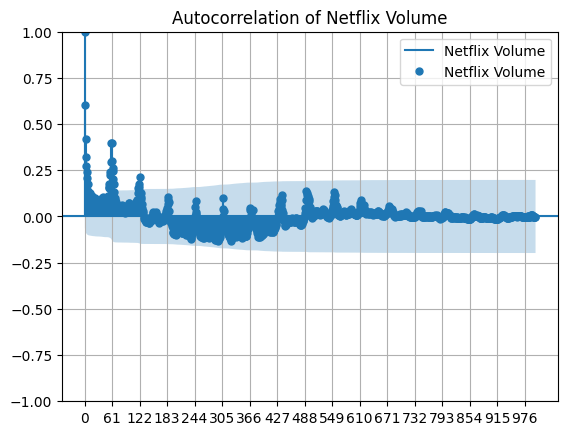

In [1447]:
fig, ax = plt.subplots()

# Plot the autocorrelation function on the defined axis
plot_acf(df['Netflix_Vol.'].dropna(), lags=1000, ax=ax, label='Netflix Volume')

# Set the title on the correct axis
ax.set_title('Autocorrelation of Netflix Volume')

# Add a legend to the correct axis
ax.legend()
ax.set_xticks(range(0, 1001, 61))  # Set ticks at 0, 60, 120, ...

# Add grid lines at every 60 lags
ax.grid(True, which='both')
# Show the plot
plt.show()

Eventually all variables do not exhibit autocorrelation in the long-term. Interestingly, correlation spikes for Netlfix and platinum volume at the 2-month mark. The most unique pattern is exhibited by crude oil and natural gas. These commodities appear to exhibit seasonality or cyclicity, with periodicity of three weeks.

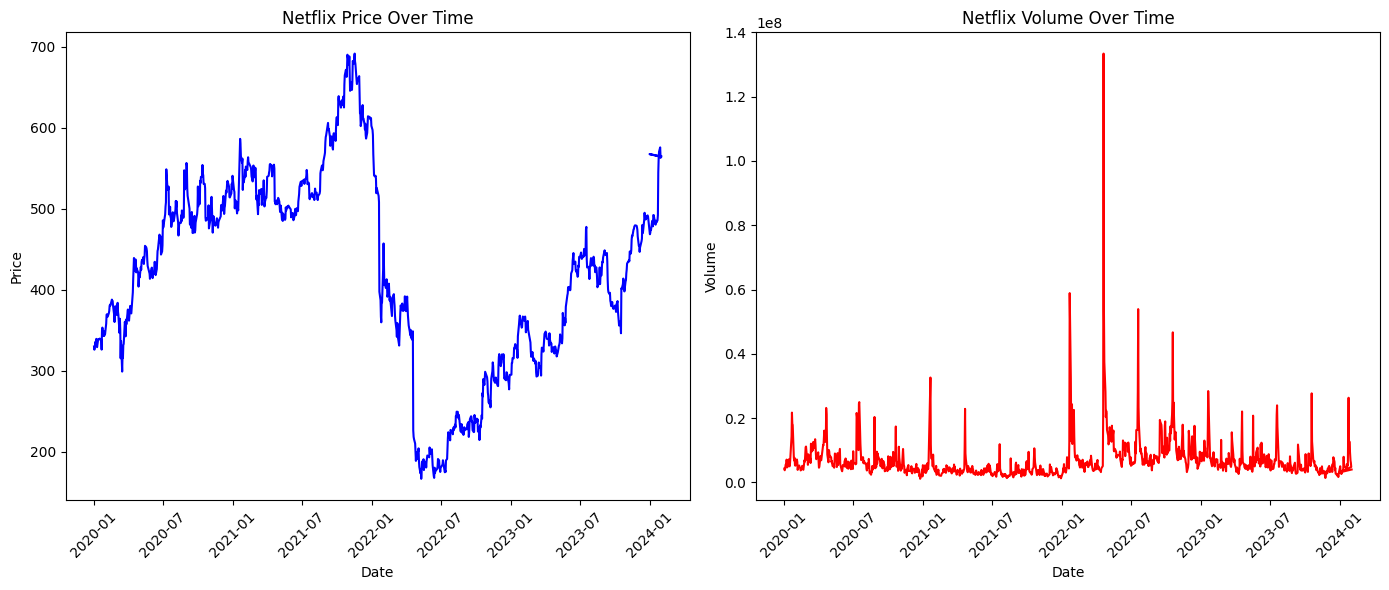

In [1448]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].plot(df.index, df['Netflix_Price'], label='Netflix Trading Price', color='blue')
ax[0].set_title('Netflix Price Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid = True

ax[1].plot(df.index, df['Netflix_Vol.'], label='Netflix Trading Volume', color='red')
ax[1].set_title('Netflix Volume Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Volume')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid = True

plt.tight_layout()
plt.show()

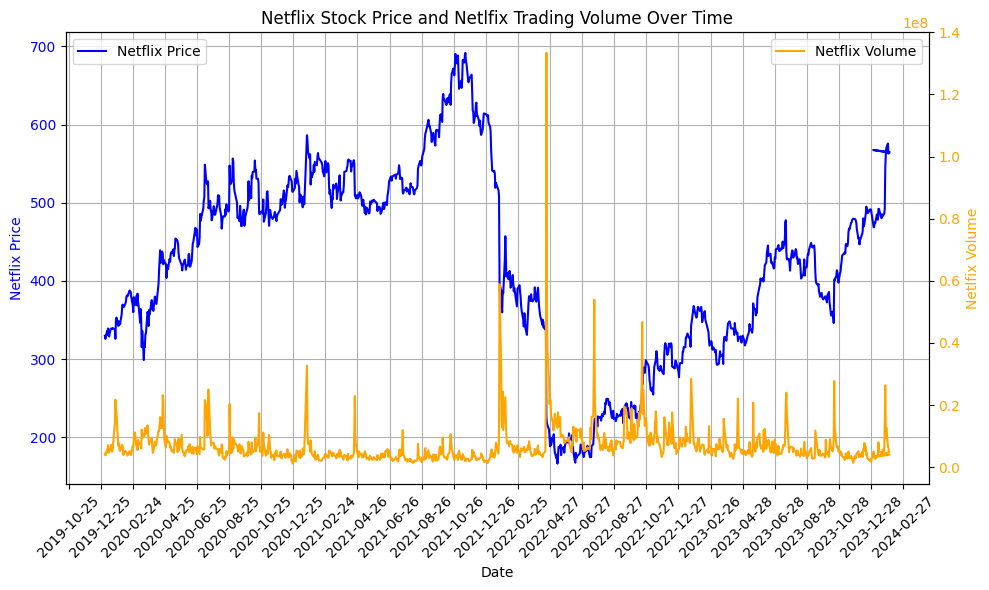

In [1449]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))

ax1 = plt.gca()  
ax1.plot(df.index, df['Netflix_Price'], label='Netflix Price', color='blue')
ax1.set_title('Netflix Stock Price and Netlfix Trading Volume Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Netflix Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.xaxis.set_major_locator(mdates.DayLocator(interval=61))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

ax2 = ax1.twinx()  
ax2.plot(df.index, df['Netflix_Vol.'], label='Netflix Volume', color='orange')
ax2.set_ylabel('Netlfix Volume', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

plt.tight_layout()
plt.show()

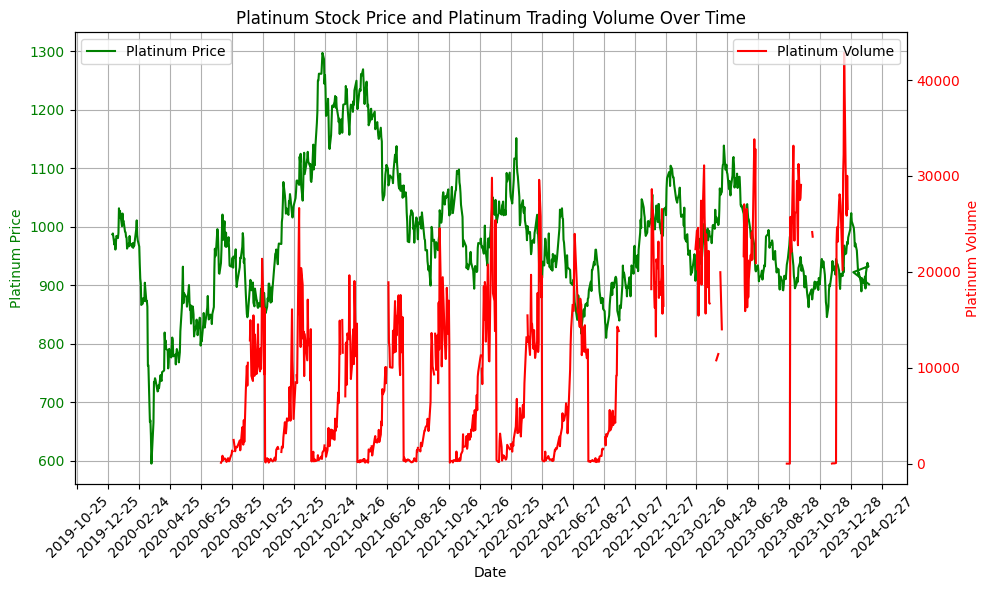

In [1450]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))

ax1 = plt.gca()  
ax1.plot(df.index, df['Platinum_Price'], label='Platinum Price', color='green')
ax1.set_title('Platinum Stock Price and Platinum Trading Volume Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Platinum Price', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax1.xaxis.set_major_locator(mdates.DayLocator(interval=61))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

ax2 = ax1.twinx()  
ax2.plot(df.index, df['Platinum_Vol.'], label='Platinum Volume', color='red')
ax2.set_ylabel('Platinum Volume', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

plt.tight_layout()
plt.show()

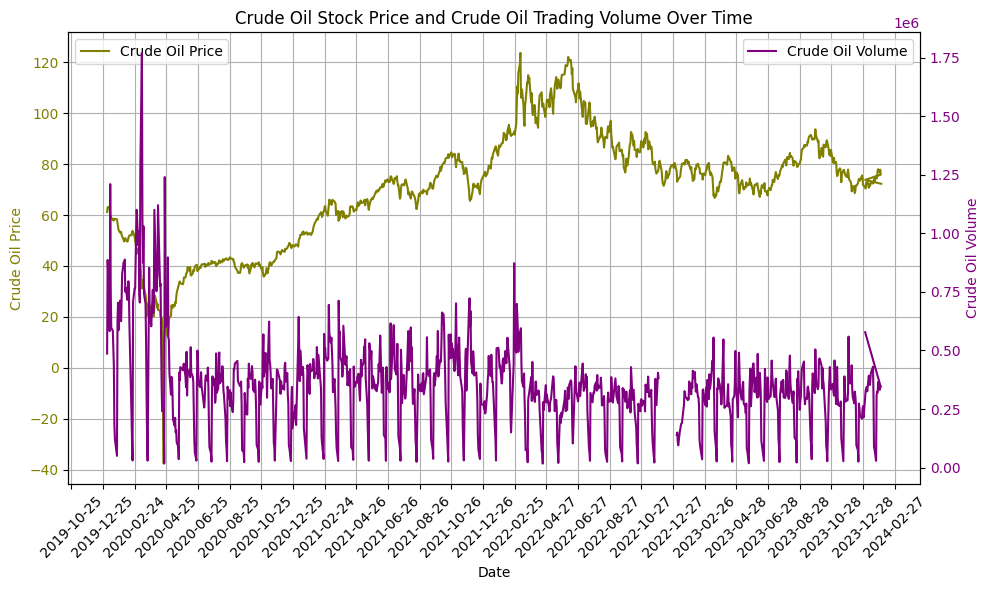

In [1451]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))

ax1 = plt.gca()  
ax1.plot(df.index, df['Crude_oil_Price'], label='Crude Oil Price', color='olive')
ax1.set_title('Crude Oil Stock Price and Crude Oil Trading Volume Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Crude Oil Price', color='olive')
ax1.tick_params(axis='y', labelcolor='olive')

ax1.xaxis.set_major_locator(mdates.DayLocator(interval=61))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

ax2 = ax1.twinx()  
ax2.plot(df.index, df['Crude_oil_Vol.'], label='Crude Oil Volume', color='purple')
ax2.set_ylabel('Crude Oil Volume', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

plt.tight_layout()
plt.show()

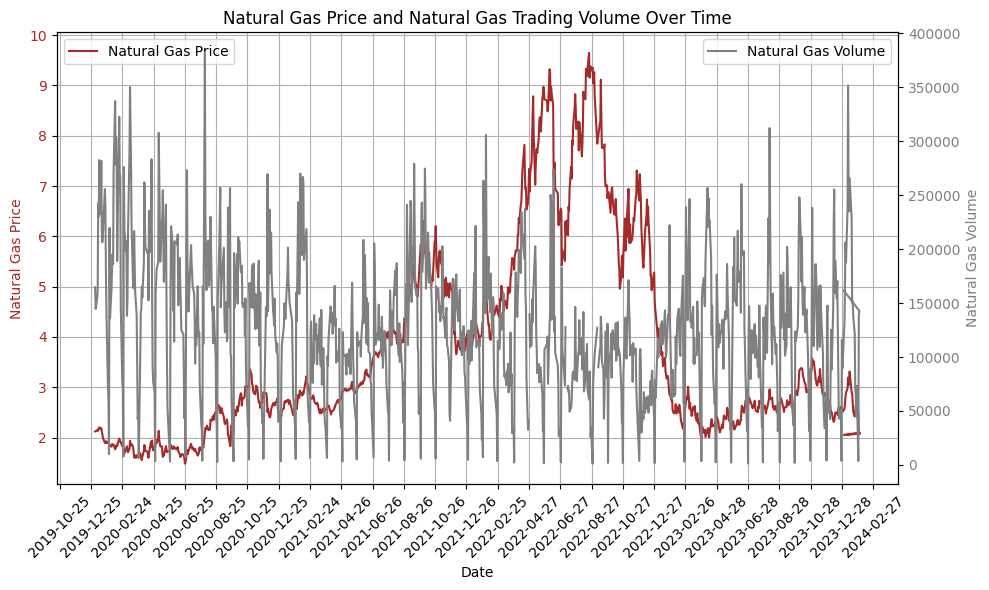

In [1452]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))

ax1 = plt.gca()  
ax1.plot(df.index, df['Natural_Gas_Price'], label='Natural Gas Price', color='brown')
ax1.set_title('Natural Gas Price and Natural Gas Trading Volume Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Natural Gas Price', color='brown')
ax1.tick_params(axis='y', labelcolor='brown')

ax1.xaxis.set_major_locator(mdates.DayLocator(interval=61))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

ax2 = ax1.twinx()  
ax2.plot(df.index, df['Natural_Gas_Vol.'], label='Natural Gas Volume', color='gray')
ax2.set_ylabel('Natural Gas Volume', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

plt.tight_layout()
plt.show()